In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

## load the Groq API key
groq_api_key=os.environ['GROQ_API_KEY']

langsmith_key = os.environ['LANGSMITH_KEY']

LANGSMITH_TRACING= "true"
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY= langsmith_key
LANGSMITH_PROJECT="Yusuf-Test"

from langchain_groq import ChatGroq

llm = ChatGroq(groq_api_key=groq_api_key, model_name = "Gemma2-9b-It")
llm






ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x10d6c8050>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x10d6c9be0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

# Chatbot 

In [2]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END 
from langgraph.graph.message import add_messages

In [3]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    
    messages:Annotated[list, add_messages]
    
    
graph_builder = StateGraph(State)


In [4]:
def chatbot(state: State):
    return {"messages": llm.invoke(state['messages'])}

In [5]:
graph_builder.add_node("chatbot",chatbot)


In [6]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [7]:
graph = graph_builder.compile()


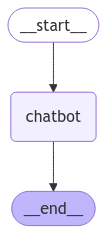

In [8]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)